In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('kununu_competitors.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,user_uuid,company_name,profile_uuid,profile_name,profile_city,profile_industry_name_en,company_uuid,company_city,...,pension_plan,clothes,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text,profile_url,company_name_short
0,20,20,7ea80496-23b9-4164-985c-7b477723589e,Robert Bosch GmbH,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,ada79380-3879-4010-aaa6-05ad898767f1,Stuttgart,...,True,NaN,True,True,True,NaN,"Faires Unternehmen, gute Konditionen, tolle Ge...",NaN,https://www.kununu.com/de/bosch-gruppe2,Bosch
1,128,128,0cb44bd1-0104-445c-a975-b99c45001781,Dr. Ing. h.c. F. Porsche AG,dd9996e3-17dd-4a87-ae39-c71de1482922,Dr. Ing. h.c. F. Porsche AG,Stuttgart-Zuffenhausen,Automotive,ac97887a-10e4-4579-9143-74a0258b604c,Stuttgart,...,True,NaN,True,True,True,NaN,NaN,NaN,https://www.kununu.com/de/dr-ing-hc-f-porsche,Porsche
2,169,169,8684b74f-072e-4878-9ef1-a0ac9329e1f6,Bosch Gruppe,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,1473843b-47fe-43cf-96d3-b05ac8bc8f5e,Ottobrunn bei München,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,https://www.kununu.com/de/bosch-gruppe2,Bosch
3,326,326,640a8bfc-3789-4239-bb0f-ccb24da465fd,Bosch Solarthermie GmbH,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,8eba49ea-8dfc-4eca-b32f-836b5cb65b89,Wettringen,...,True,NaN,NaN,True,NaN,Mhh... Soll so bleiben,"Die tollen Kollegen, ein super Team",Nix,https://www.kununu.com/de/bosch-gruppe2,Bosch
4,376,376,3f69170d-2dc0-43c1-a196-7356f7ed1021,Bosch Packaging Systems GmbH,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,d60ff3d8-522d-43cb-ad63-74a7f804a820,Remshalden,...,NaN,NaN,NaN,True,NaN,Mehr Flexibilität und Kundenorientierung.,NaN,NaN,https://www.kununu.com/de/bosch-gruppe2,Bosch


In [61]:
columns_to_average = [
    'employer_atmosphere_score', 'employer_communication_score',
    'employer_teamwork_score', 'employer_work_life_score', 'employer_leadership_score',
    'employer_tasks_score', 'employer_equality_score', 'employer_old_colleagues_score',
    'employer_work_conditions_score', 'employer_environment_score', 
    'employer_salary_score', 'employer_image_score', 'employer_career_score'
]


grouped_df = df.groupby('company_name_short')[columns_to_average].mean().round(1).reset_index()
grouped_df['total_score'] = grouped_df[columns_to_average].sum(axis=1)
grouped_df.sort_values(by='total_score', ascending=False, inplace=True)

grouped_df.head(11)


,company_name_short,employer_atmosphere_score,employer_communication_score,employer_teamwork_score,employer_work_life_score,employer_leadership_score,employer_tasks_score,employer_equality_score,employer_old_colleagues_score,employer_work_conditions_score,employer_environment_score,employer_salary_score,employer_image_score,employer_career_score,total_score
1,Bosch,4.1,3.8,4.2,4.0,3.8,4.1,4.2,4.3,4.1,4.1,4.1,4.2,3.8,52.8
9,Porsche,4.1,3.8,4.2,3.8,3.9,4.1,4.2,4.3,4.2,3.9,4.0,4.3,3.8,52.6
7,Mercedes-Benz,4.0,3.7,4.2,4.0,3.8,3.9,4.2,4.3,4.1,3.9,3.9,4.2,3.6,51.8
4,Hugo Boss,4.0,3.5,4.0,4.0,3.6,4.1,4.0,4.2,4.2,3.9,3.6,4.3,3.6,51.0
0,Adidas,3.7,3.4,3.8,3.7,3.5,3.7,3.9,3.7,3.7,3.9,3.6,3.9,3.5,48.0
10,Ralph Lauren,3.7,3.4,3.5,3.5,3.5,3.7,3.8,3.9,3.5,3.4,3.5,4.0,3.5,46.9
8,PVH,3.9,3.2,4.0,3.3,3.4,3.6,3.8,3.9,3.8,3.3,3.1,4.3,3.3,46.9
6,Marc O'Polo,3.7,3.3,3.9,3.3,3.3,3.6,3.8,3.9,3.6,3.7,3.1,3.9,3.1,46.2
5,LVMH,3.5,3.3,3.9,3.4,3.3,3.7,3.8,3.8,3.6,3.3,3.0,4.1,3.2,45.9
2,Burberry,3.3,3.6,3.6,3.6,2.9,3.7,3.4,3.5,3.3,3.5,3.4,3.7,3.1,44.6


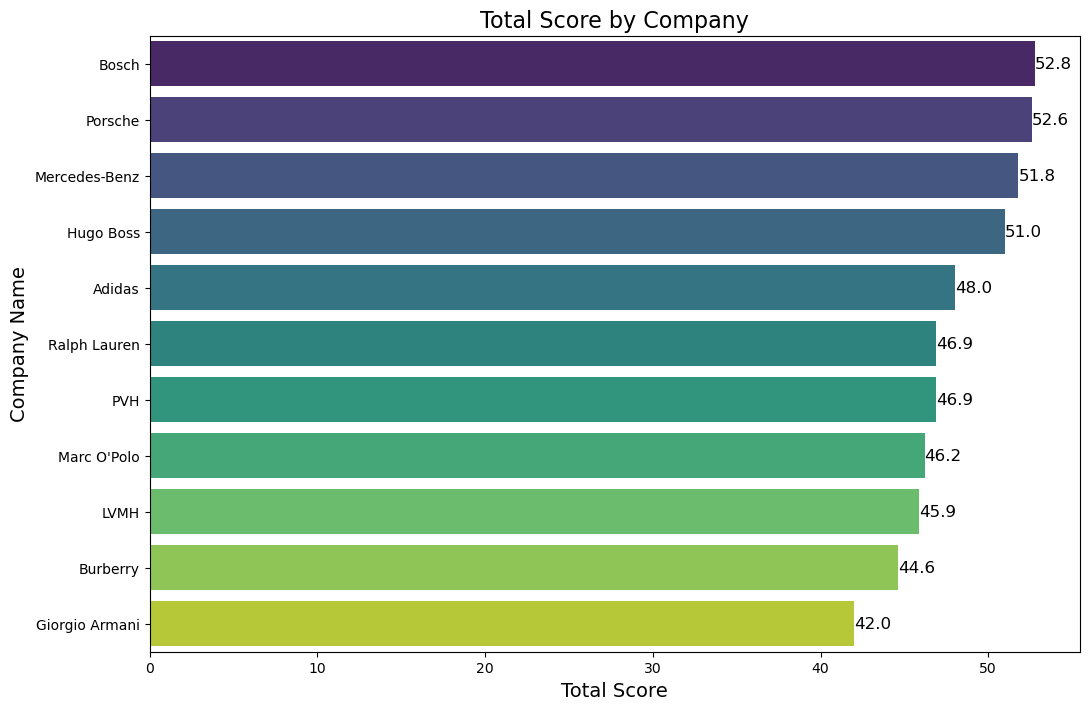

In [62]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='total_score', y='company_name_short', data=grouped_df, palette='viridis')

sns.barplot(x='total_score', y='company_name_short', data=grouped_df, palette='viridis')
plt.title('Total Score by Company', fontsize=16)
plt.xlabel('Total Score', fontsize=14)
plt.ylabel('Company Name', fontsize=14)

for index, value in enumerate(grouped_df['total_score']):
    ax.text(value, index, f'{value:.1f}', va='center', ha='left', fontsize=12, color='black')
plt.show()



In [63]:
hugo_boss_scores = grouped_df[grouped_df['company_name_short'] == 'Hugo Boss'][columns_to_average].values.flatten()
top_companies = grouped_df.head(3)['company_name_short']
top_companies_scores = grouped_df[grouped_df['company_name_short'].isin(top_companies)]

differences = {}
for company in top_companies:
    company_scores = top_companies_scores[top_companies_scores['company_name_short'] == company][columns_to_average].values.flatten()
    differences[company] = company_scores - hugo_boss_scores

difference_df = pd.DataFrame(differences, index=columns_to_average)
difference_df

,Bosch,Porsche,Mercedes-Benz
employer_atmosphere_score,0.1,0.1,0.0
employer_communication_score,0.3,0.3,0.2
employer_teamwork_score,0.2,0.2,0.2
employer_work_life_score,0.0,-0.2,0.0
employer_leadership_score,0.2,0.3,0.2
employer_tasks_score,0.0,0.0,-0.2
employer_equality_score,0.2,0.2,0.2
employer_old_colleagues_score,0.1,0.1,0.1
employer_work_conditions_score,-0.1,0.0,-0.1
employer_environment_score,0.2,0.0,0.0


In [64]:
difference_df['diff'] = difference_df.sum(axis=1)
difference_df  = difference_df.sort_values(by='diff', ascending=False)
difference_df = difference_df.reset_index()
difference_df

,index,Bosch,Porsche,Mercedes-Benz,diff
0,employer_salary_score,0.5,0.4,0.3,1.2
1,employer_communication_score,0.3,0.3,0.2,0.8
2,employer_leadership_score,0.2,0.3,0.2,0.7
3,employer_teamwork_score,0.2,0.2,0.2,0.6
4,employer_equality_score,0.2,0.2,0.2,0.6
5,employer_career_score,0.2,0.2,0.0,0.4
6,employer_old_colleagues_score,0.1,0.1,0.1,0.3
7,employer_environment_score,0.2,0.0,0.0,0.2
8,employer_atmosphere_score,0.1,0.1,0.0,0.2
9,employer_image_score,-0.1,0.0,-0.1,-0.2


In [65]:
import re

def extract_short_name(full_name):
    
    match = re.search(r'employer_(.*)_score', full_name)
    if match:
        return match.group(1)
    else:
        return full_name  
    
difference_df['index'] = difference_df['index'].map(extract_short_name)

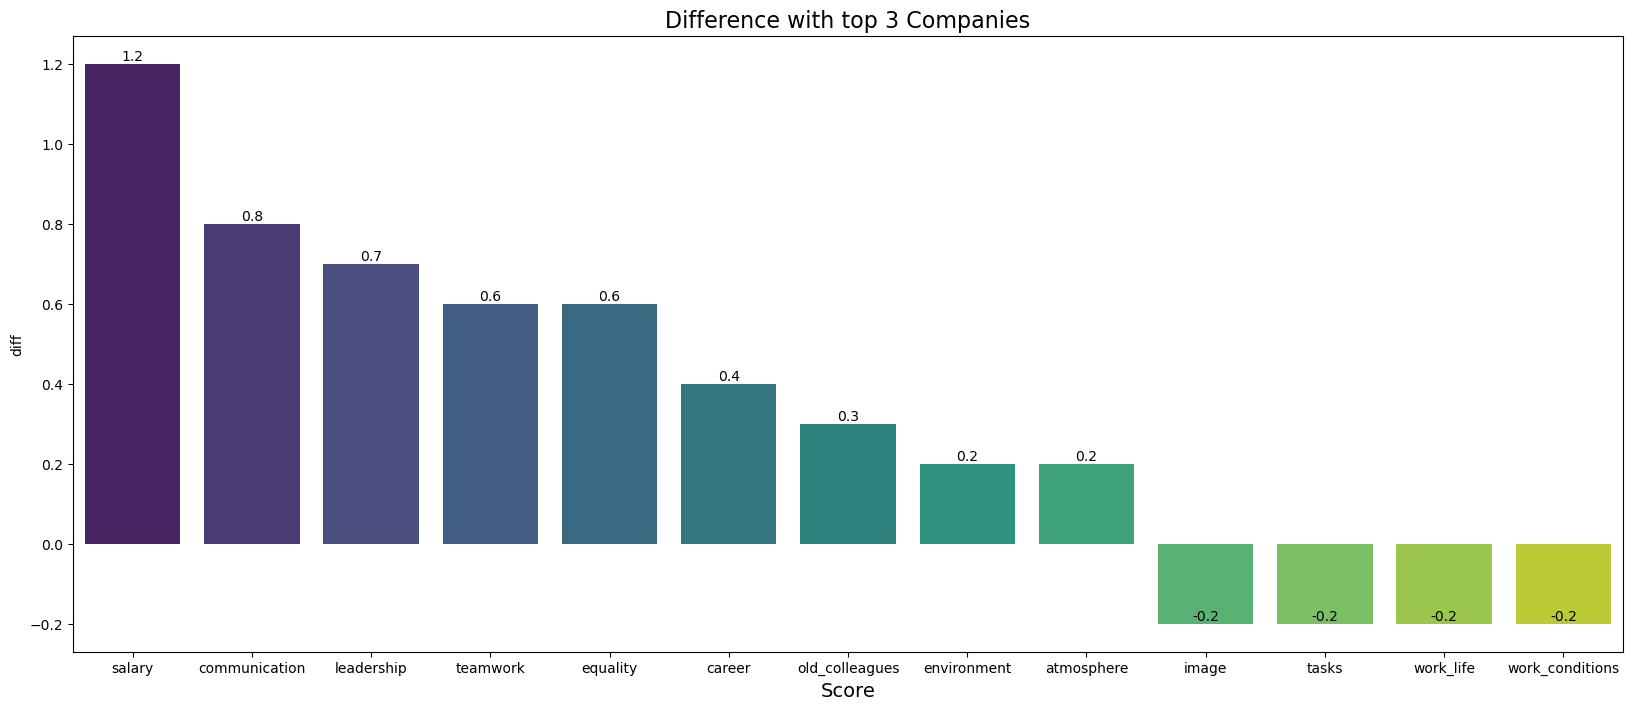

In [66]:
plt.figure(figsize=(20,8))

ax = sns.barplot(x='index', y='diff', data=difference_df, palette='viridis')
plt.title('Difference with top 3 Companies', fontsize=16)
plt.xlabel('Score', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()
